In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df = pd.read_csv('/content/gdrive/My Drive/DataSets/banknotes.csv')

In [4]:
df.head

<bound method NDFrame.head of      conterfeit  Length   Left  Right  Bottom   Top  Diagonal
0             0   214.8  131.0  131.1     9.0   9.7     141.0
1             0   214.6  129.7  129.7     8.1   9.5     141.7
2             0   214.8  129.7  129.7     8.7   9.6     142.2
3             0   214.8  129.7  129.6     7.5  10.4     142.0
4             0   215.0  129.6  129.7    10.4   7.7     141.8
..          ...     ...    ...    ...     ...   ...       ...
195           1   215.0  130.4  130.3     9.9  12.1     139.6
196           1   215.1  130.3  129.9    10.3  11.5     139.7
197           1   214.8  130.3  130.4    10.6  11.1     140.0
198           1   214.7  130.7  130.8    11.2  11.2     139.4
199           1   214.3  129.9  129.9    10.2  11.5     139.6

[200 rows x 7 columns]>

In [5]:
df.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8


In [6]:
df.describe()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.500000,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500
std,0.501255,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266
min,0.000000,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000
25%,0.000000,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000
50%,0.500000,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000
75%,1.000000,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000
max,1.000000,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   conterfeit  200 non-null    int64  
 1   Length      200 non-null    float64
 2   Left        200 non-null    float64
 3   Right       200 non-null    float64
 4   Bottom      200 non-null    float64
 5   Top         200 non-null    float64
 6   Diagonal    200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


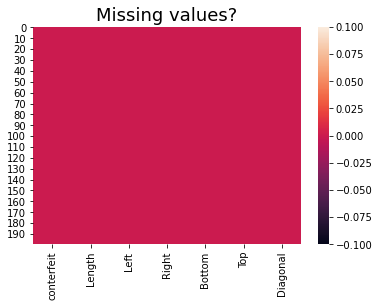

In [8]:
sns.heatmap(df.isnull())
plt.title("Missing values?", fontsize = 18)
plt.show()

In [9]:
#NO MISSING VALUES

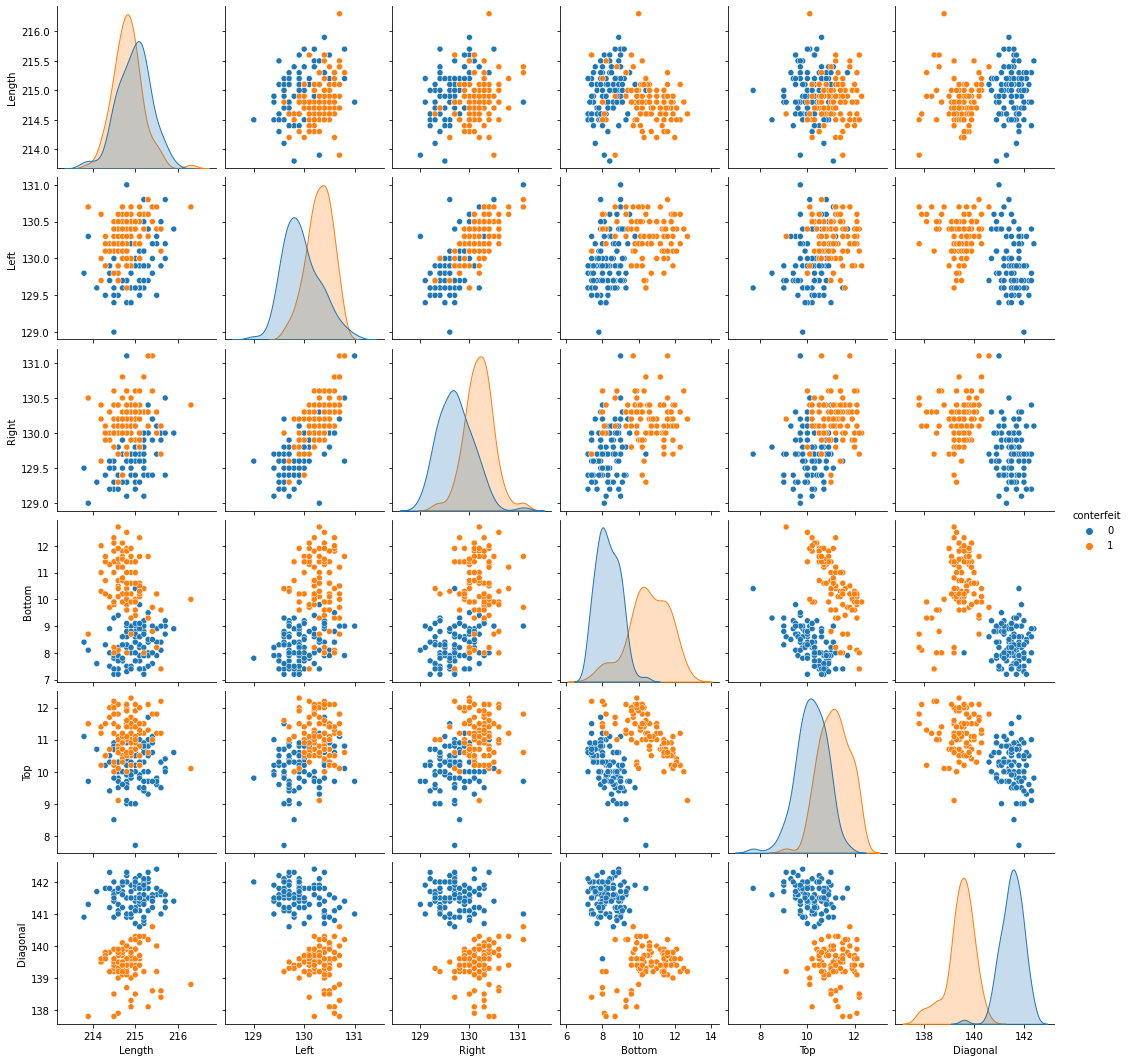

In [10]:
sns.pairplot(df, hue = "conterfeit")
plt.show()

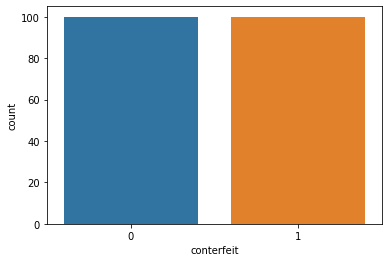

In [11]:
sns.countplot(x='conterfeit',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


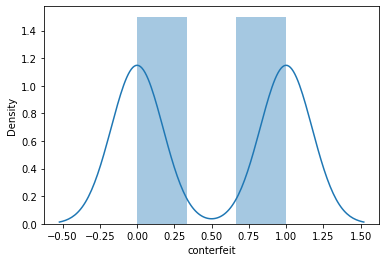

In [12]:
sns.distplot(df.conterfeit)

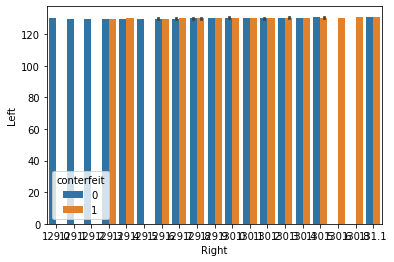

In [13]:
sns.barplot (x='Right',y='Left',data=df,hue='conterfeit')

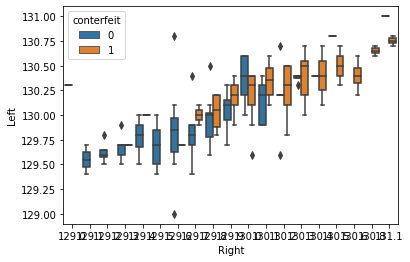

In [14]:
sns.boxplot (x='Right',y='Left',data=df,hue='conterfeit')

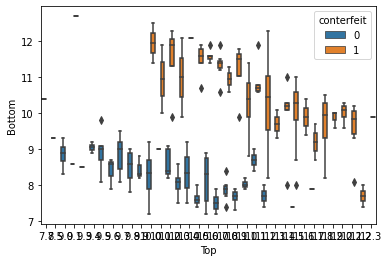

In [15]:
sns.boxplot(x='Top',y='Bottom',data=df,hue='conterfeit')


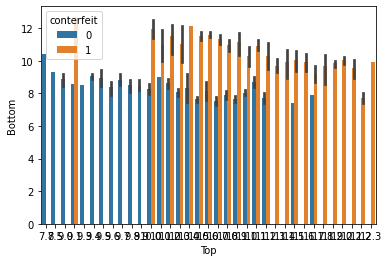

In [16]:
sns.barplot(x='Top',y='Bottom',data=df,hue='conterfeit')

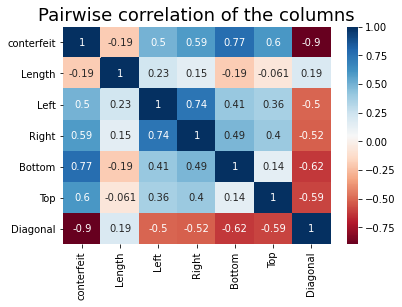

In [17]:
sns.heatmap(df.corr(), annot = True, cmap="RdBu")
plt.title("Pairwise correlation of the columns", fontsize = 18)
plt.show()

In [18]:
df = df.reindex(np.random.permutation(df.index))

X = df.drop(columns = "conterfeit")
y = df["conterfeit"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train = st.fit_transform(X_train)

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

pred = model.predict(st.transform(X_test))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

class_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n",acc)

results = []
results.append(("LogisticRegression",class_report, conf_matrix, acc))

Classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix
 [[20  0]
 [ 0 20]]

Accuracy
 1.0


In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

pred = rfc.predict(st.transform(X_test))

class_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n",acc)

results.append(("RandomForestClassifier",class_report, conf_matrix, acc))

Classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix
 [[20  0]
 [ 0 20]]

Accuracy
 1.0


In [21]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

pred = dtc.predict(st.transform(X_test))

class_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n",acc)

results.append(("DecisionTreeClassifier",class_report, conf_matrix, acc))

Classification report:

               precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.95      0.97        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40

Confusion Matrix
 [[20  0]
 [ 1 19]]

Accuracy
 0.975


In [22]:
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(6))
model.add(Dense(10))
model.add(Dense(10))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train.values, epochs = 50, verbose = 0)


In [23]:
pred = model.predict(st.transform(X_test))
pred = [int(round(t)) for t in pred.reshape(1,-1)[0]]

class_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n",acc)

results.append(("Neural Network",class_report, conf_matrix, acc))

Classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix
 [[20  0]
 [ 0 20]]

Accuracy
 1.0


In [24]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train, y_train)

pred = svc.predict(st.transform(X_test))

class_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n",acc)

results.append(("SVC",class_report, conf_matrix, acc))

Classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix
 [[20  0]
 [ 0 20]]

Accuracy
 1.0


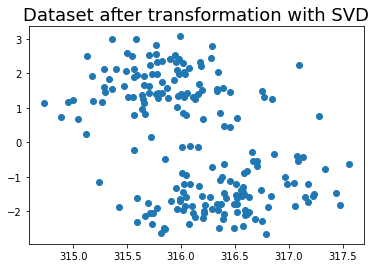

In [25]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 2, random_state = 0)

transf = svd.fit_transform(X)

plt.scatter(x = transf[:,0], y = transf[:,1])
plt.title("Dataset after transformation with SVD", fontsize = 18)
plt.show()

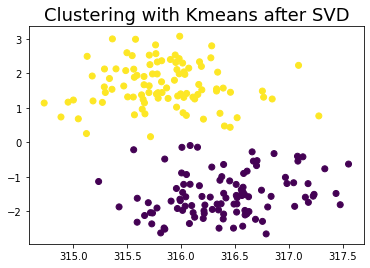

In [26]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 2)
c = km.fit_predict(transf)

plt.scatter(x = transf[:,0], y = transf[:,1], c = c)
plt.title("Clustering with Kmeans after SVD", fontsize = 18)
plt.show()

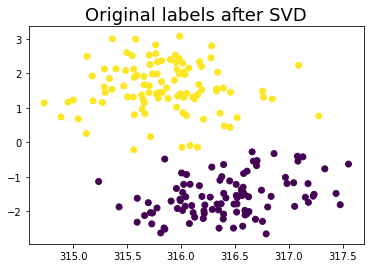

In [27]:
plt.scatter(x = transf[:,0], y = transf[:,1], c = y)
plt.title("Original labels after SVD", fontsize = 18)
plt.show()

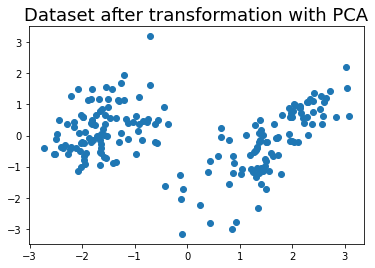

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state = 0)

transf = pca.fit_transform(X)

plt.scatter(x = transf[:,0], y = transf[:,1])
plt.title("Dataset after transformation with PCA", fontsize = 18)
plt.show()

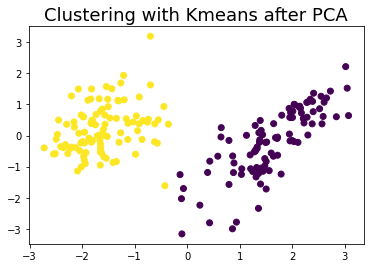

In [29]:
km = KMeans(n_clusters = 2)
c = km.fit_predict(transf)

plt.scatter(x = transf[:,0], y = transf[:,1], c = c)
plt.title("Clustering with Kmeans after PCA", fontsize = 18)
plt.show()

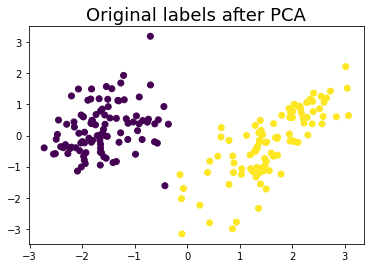

In [30]:
plt.scatter(x = transf[:,0], y = transf[:,1], c = y)
plt.title("Original labels after PCA", fontsize = 18)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


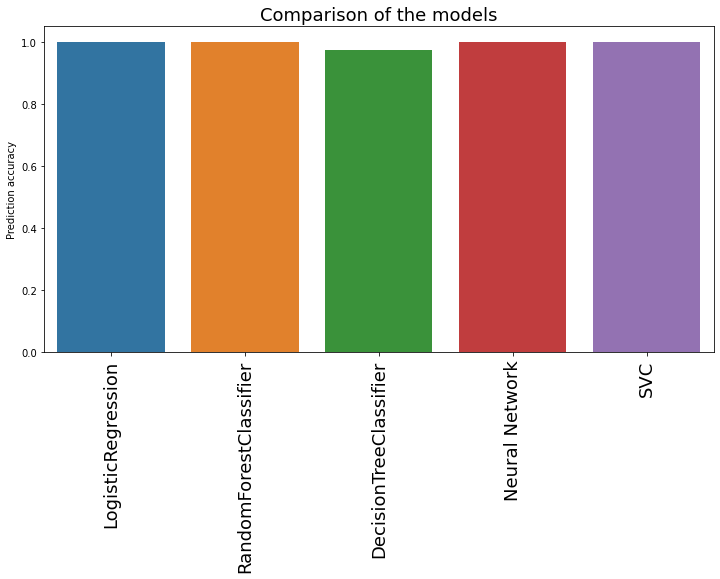

In [31]:
labels  = []
height = []
for i in range(len(results)):
    labels.append(results[i][0])
    height.append(results[i][-1])
    
plt.figure(figsize = (12,6))    
ax = sns.barplot(labels,height)
ax.set_xticklabels(labels, fontsize = 18, rotation = 90)
plt.title("Comparison of the models", fontsize = 18)
plt.ylabel("Prediction accuracy")
plt.show()